In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
engine.execute('SELECT * FROM measurement order by date desc LIMIT 5').fetchall()

[(2723, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19549, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2722, 'USC00519397', '2017-08-22', 0.0, 82.0)]

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
session = Session(engine)

In [8]:
measurement = Base.classes.measurement

In [9]:
station = Base.classes.station

In [10]:
one_year_data = engine.execute('SELECT * FROM measurement order by date desc LIMIT 2230').fetchall()

In [11]:
from pandas import DataFrame
prcp = DataFrame(one_year_data)
prcp.head()

,0,1,2,3,4
0,2723,USC00519397,2017-08-23,0.00,81.0
1,7634,USC00514830,2017-08-23,0.00,82.0
2,12186,USC00519523,2017-08-23,0.08,82.0
3,19549,USC00516128,2017-08-23,0.45,76.0
4,2722,USC00519397,2017-08-22,0.00,82.0


In [12]:
prcp.pop(0)
prcp.pop(1)
prcp.pop(4)
prcp.head()

,2,3
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [13]:
prcp_df = prcp.rename(columns={2: 'Date', 3: 'Precipitation'})
prcp_df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


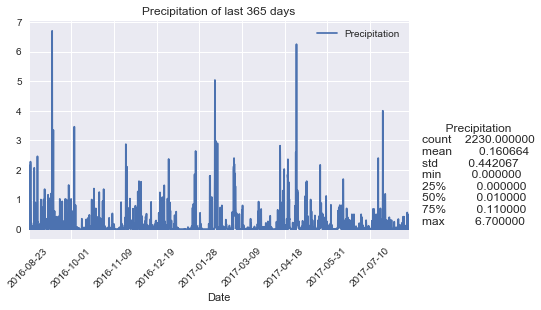

In [14]:
import seaborn as sns
import datetime
sns.set()
prcp_df.set_index(pd.DatetimeIndex(prcp_df['Date']),inplace=True)

plt.figure(figsize=(20,10))
prcp_df.iloc[::-1].plot('Date', 'Precipitation',title='Precipitation of last 365 days')
plt.tight_layout()
plt.xticks(rotation=45)
plt.figtext(1.0, 0.2, prcp_df.describe())

plt.show()

In [18]:
# total number of stations
station_rows = session.query(station).count()
station_rows

9

In [20]:
station_ex = engine.execute('SELECT * FROM station').fetchall()
station_df = DataFrame(station_ex)
station_df.head()

,0,1,2,3,4,5,6
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,POINT(21.2716 -157.8168)
1,1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,POINT(21.4234 -157.8015)
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,POINT(21.5213 -157.8374)
3,3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,POINT(21.3934 -157.9751)
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,POINT(21.4992 -158.0111)


In [25]:
measurement_ex = engine.execute('SELECT * FROM measurement').fetchall()
measurement_df = DataFrame(measurement_ex)
measurement_df = measurement_df.rename(columns={0:'index', 1:'Station',2: 'Date', 3: 'Precipitation', 4:'Temperature'})
measurement_df.head()

,index,Station,Date,Precipitation,Temperature
0,0,USC00519397,2010-01-01,0.08,65.0
1,1,USC00519397,2010-01-02,0.00,63.0
2,2,USC00519397,2010-01-03,0.00,74.0
3,3,USC00519397,2010-01-04,0.00,76.0
4,4,USC00519397,2010-01-06,0.00,73.0


In [46]:
#most active stations
active_stations = measurement_df.groupby(['Station']).count()
active_stations.sort_values('index', ascending=False)

,index,Date,Precipitation,Temperature
Station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2724,2724
USC00513117,2709,2709,2709,2709
USC00519523,2669,2669,2669,2669
USC00516128,2612,2612,2612,2612
USC00514830,2202,2202,2202,2202
USC00511918,1979,1979,1979,1979
USC00517948,1372,1372,1372,1372
USC00518838,511,511,511,511


In [47]:
tobs = DataFrame(one_year_data)
tobs.head()

,0,1,2,3,4
0,2723,USC00519397,2017-08-23,0.00,81.0
1,7634,USC00514830,2017-08-23,0.00,82.0
2,12186,USC00519523,2017-08-23,0.08,82.0
3,19549,USC00516128,2017-08-23,0.45,76.0
4,2722,USC00519397,2017-08-22,0.00,82.0


In [49]:
tobs.pop(0)
tobs.pop(1)
tobs.pop(3)
tobs.head()

,2,4
0,2017-08-23,81.0
1,2017-08-23,82.0
2,2017-08-23,82.0
3,2017-08-23,76.0
4,2017-08-22,82.0


In [50]:
tobs_df = tobs.rename(columns={2: 'Date', 4: 'Temperature'})
tobs_df.head()

,Date,Temperature
0,2017-08-23,81.0
1,2017-08-23,82.0
2,2017-08-23,82.0
3,2017-08-23,76.0
4,2017-08-22,82.0


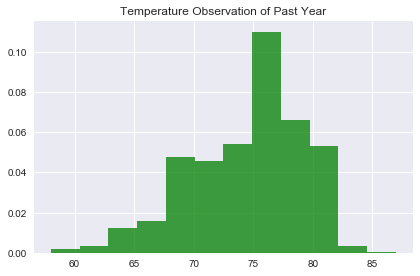

In [101]:
plt.hist(tobs_df['Temperature'], 12, normed=1, facecolor='g', alpha=0.75)

plt.title("Temperature Observation of Past Year")

plt.tight_layout()

plt.show()

In [102]:
start = input("Define a start date ('yyyy-mm-dd'): ")
end = input("Define an end date ('yyyy-mm-dd'): ")
start_date = start.replace(start[3], str(int(start[3])-1))
end_date = end.replace(end[3], str(int(end[3])-1))

one_year = datetime.datetime.now() - datetime.timedelta(days=365)
last_year = "%s-%s-%s" % (one_year.year,one_year.month,one_year.day)

Define a start date ('yyyy-mm-dd'): 2017-01-01
Define an end date ('yyyy-mm-dd'): 2017-12-31


In [104]:
year_temp = session.query(measurement.date, measurement.tobs).filter(measurement.date >= last_year).all()
dates_yr = [result[0] for result in year_temp[:]]
tobs_yr = [result[1] for result in year_temp[:]]

In [109]:
tobs_list = pd.DataFrame(
    {'dates': dates_yr,
     'list': tobs_yr
    })
tobs_list.head()

,dates,list
0,2016-12-13,67.0
1,2016-12-14,70.0
2,2016-12-15,66.0
3,2016-12-16,62.0
4,2016-12-17,71.0


In [113]:
tobs_avg = tobs_list['list'].mean()
tobs_avg

73.90526315789474

In [114]:
tobs_min = tobs_list['list'].min()
tobs_min

58.0

In [115]:
tobs_max = tobs_list['list'].max()
tobs_max

87.0

In [127]:
tempan = DataFrame({"index":[1],"Average Temp":[tobs_avg]})
tempan

,Average Temp,index
0,73.905263,1


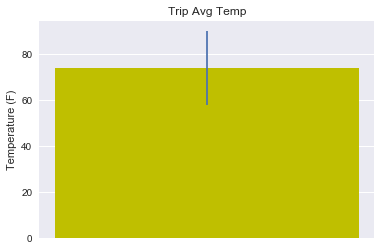

In [144]:
e =[tobs_avg - tobs_min]
plt.bar(tempan['index'], tempan["Average Temp"],facecolor='y')
plt.errorbar(tempan["index"], tempan["Average Temp"], yerr=e)

plt.axes().get_xaxis().set_visible(False)
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.show()